# Comparing interactions picked up in twins and in validation cohort (only healthy donors and group Ia donors (Freiburg))

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import pandas as pd
import seaborn as sns
import scanpy as sc
from glob import iglob
import anndata
# requires 'pip install scrublet'
#import scrublet as scr
import os
import sklearn
from sklearn.linear_model import LogisticRegression
import matplotlib as mpl
import scipy
import matplotlib.pyplot as plt
import pickle

In [2]:
np.random.seed(0)

In [3]:
%%bash

pip freeze

aiohttp==3.6.2
airr==1.3.1
alembic==1.3.0
anndata==0.7.5
annoy==1.16.2
async-generator==1.10
async-timeout==3.0.1
attrs==19.3.0
backcall==0.1.0
bbknn==1.3.6
bleach==3.1.0
blinker==1.4
CellPhoneDB==2.1.5
certifi==2019.9.11
certipy==0.1.3
cffi==1.13.2
chardet==3.0.4
click==6.7
conda==4.7.12
conda-package-handling==1.6.0
cryptography==2.8
cycler==0.10.0
Cython==0.29.14
decorator==4.4.1
defusedxml==0.6.0
entrypoints==0.3
fbpca==1.0
geosketch==0.3
get-version==2.1
h5py==2.10.0
idna==2.7
imageio==2.9.0
importlib-metadata==0.23
intervaltree==2.1.0
ipykernel==5.1.3
ipython==7.9.0
ipython-genutils==0.2.0
jedi==0.15.1
Jinja2==2.10.3
joblib==0.14.0
json5==0.8.5
jsonschema==3.1.1
jupyter-client==5.3.3
jupyter-core==4.5.0
jupyter-rsession-proxy==1.0b6
jupyter-server-proxy==1.2.0
jupyterhub==1.0.0
jupyterlab==1.2.1
jupyterlab-server==1.0.6
kiwisolver==1.1.0
legacy-api-wrap==1.2
leidenalg==0.7.0
llvmlite==0.30.0
loompy==3.0.6
louvain==0.6.1
Mako==1.1.0
MarkupSafe==1.1.1
matplotlib==3.3.4
mistune==0.8

In [4]:
sc.settings.verbosity = 3  # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_versions()
sc.settings.set_figure_params(dpi=80)  # low dpi (dots per inch) yields small inline figures

-----
anndata     0.7.5
scanpy      1.6.0
sinfo       0.3.1
-----
PIL                 8.1.0
anndata             0.7.5
attr                19.3.0
backcall            0.1.0
cffi                1.13.2
constants           NA
cycler              0.10.0
cython_runtime      NA
dateutil            2.8.1
decorator           4.4.1
get_version         2.1
h5py                2.10.0
highs_wrapper       NA
igraph              0.7.1
importlib_metadata  0.23
ipykernel           5.1.3
ipython_genutils    0.2.0
jedi                0.15.1
joblib              0.14.0
kiwisolver          1.1.0
legacy_api_wrap     1.2
leidenalg           0.7.0
llvmlite            0.30.0
louvain             0.6.1
matplotlib          3.3.4
more_itertools      NA
mpl_toolkits        NA
natsort             6.2.0
numba               0.46.0
numexpr             2.7.0
numpy               1.17.4
packaging           19.2
pandas              0.25.3
parso               0.5.1
pexpect             4.7.0
pickleshare         0.7.5
pkg_resou

In [5]:
path_twins = '/lustre/scratch117/cellgen/team292/aa22/adata_objects/202009_CVID_revision/202102_twins_reanalysis/'
path_validation_cohort = '/lustre/scratch117/cellgen/team292/aa22/adata_objects/202009_CVID_revision/'

In [6]:
# reading in final object for twins
adata_twins = sc.read(path_twins + 'adata_hvg_bbknn_by_sample_nodoublets_20_PCs_final_manifold_with_annotation_after_celanup.h5ad')
adata_twins

AnnData object with n_obs × n_vars = 16901 × 2428
    obs: 'activation', 'barcode_sample', 'batch', 'bh_pval', 'condition', 'n_counts', 'n_genes', 'percent_mito', 'sample', 'scrublet_cluster_score', 'scrublet_score', 'technique', 'is_doublet', 'probabilities', 'celltype_predictions', 'cell_type', 'S_score', 'G2M_score', 'phase'
    var: 'gene_ids-0', 'feature_types-0', 'genome-0', 'n_cells-0', 'gene_ids-1', 'feature_types-1', 'genome-1', 'n_cells-1', 'gene_ids-2', 'feature_types-2', 'genome-2', 'n_cells-2', 'gene_ids-3', 'feature_types-3', 'genome-3', 'n_cells-3', 'gene_ids-4', 'feature_types-4', 'genome-4', 'n_cells-4', 'gene_ids-5', 'feature_types-5', 'genome-5', 'n_cells-5', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'activation_colors', 'ccgs', 'cell_type_colors', 'celltype_predictions_colors', 'condition_colors', 'hvg', 'neighbors', 'pca', 'phase_colors', 'sample_colors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'conne

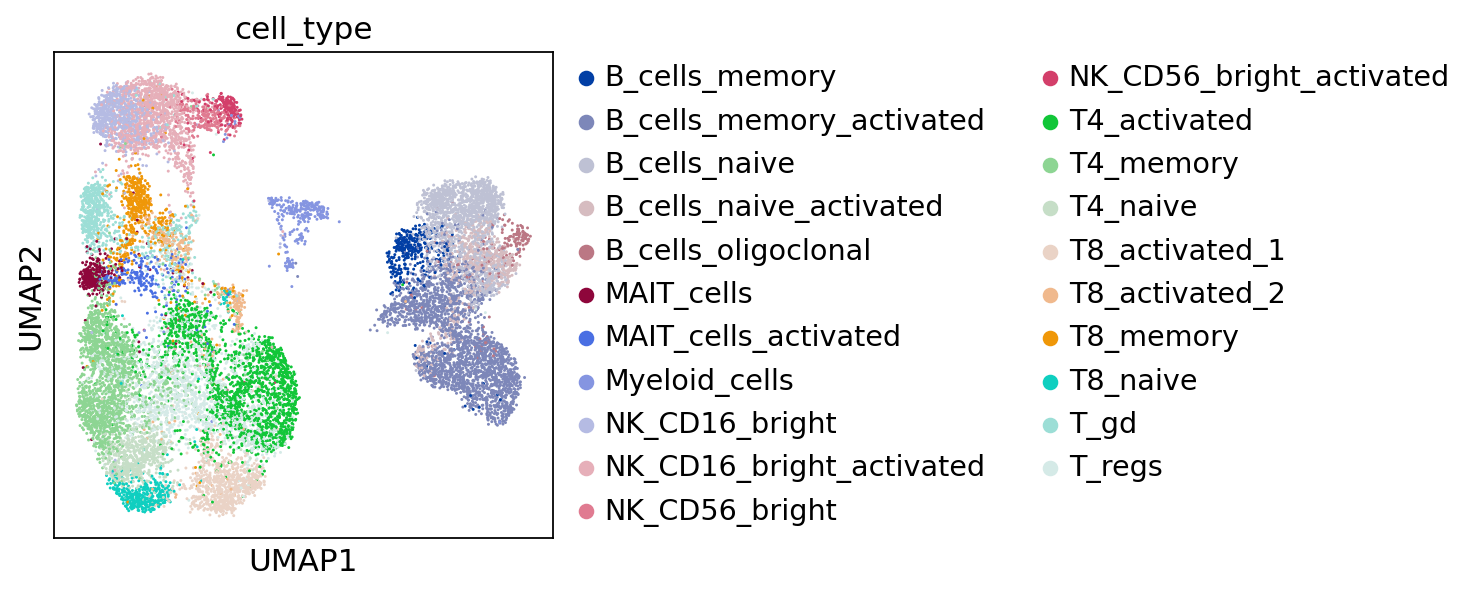

In [7]:
sc.pl.umap(adata_twins, color=['cell_type'])

In [8]:
# reading in final object for twins
adata_validation_cohort = sc.read(path_validation_cohort + 'adata_hvg_bbknn_by_sample_validation_cohort_final_manifold_with_annotation_20210217.h5ad')
adata_validation_cohort

AnnData object with n_obs × n_vars = 95064 × 2627
    obs: 'batch', 'bh_pval', 'cell_id', 'dataset', 'n_counts', 'n_genes', 'percent_mito', 'sample', 'scrublet_cluster_score', 'scrublet_score', 'stimulation', 'technique', 'is_doublet', 'donor', 'cell_type', 'prelim_annot', 'celltype_predictions', 'probabilities', 'S_score', 'G2M_score', 'phase', 'n_counts_protein', 'n_counts_protein_lognorm', 'louvain', 'barcode', 'Age', 'Sex', 'Age of disease onset', 'Autoimmunity', 'Gastrointestinal disease', 'Lung disease (bronchiectasis)', 'Lymphoadenopathy ', 'Splenomegaly', 'History of hypogammaglobulinemia, IgA deficiency or immunodeficiency in other family members', 'CVID_status', 'GC_celltype_predictions_all_genes', 'probabilities_GC_all_genes'
    var: 'gene_ids-0', 'feature_types-0', 'genome-0', 'n_cells-0', 'gene_ids-1', 'feature_types-1', 'genome-1', 'n_cells-1', 'gene_ids-2', 'feature_types-2', 'genome-2', 'n_cells-2', 'gene_ids-3', 'feature_types-3', 'genome-3', 'n_cells-3', 'gene_ids-4'

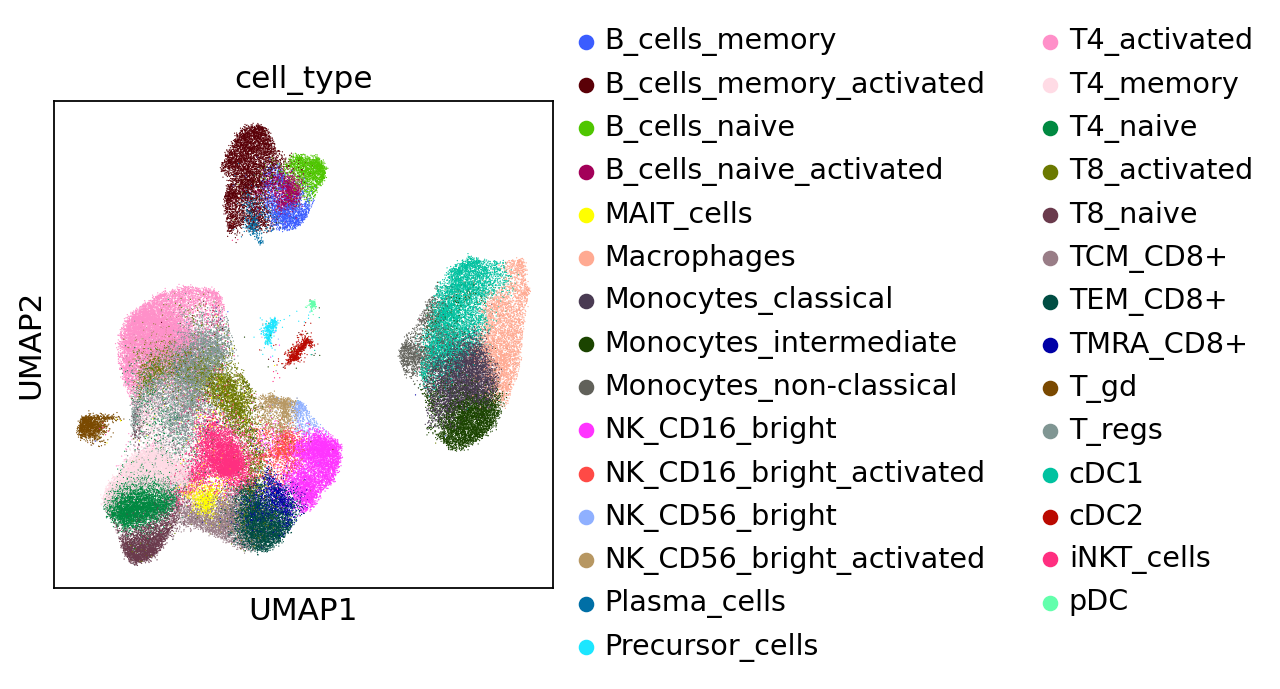

In [9]:
sc.pl.umap(adata_validation_cohort, color=['cell_type'])

In [10]:
def add_classification_Freiburg(adata_obj, barcode):
    
    curr_donor = adata_obj.obs.loc[barcode, 'donor']
    
    if curr_donor in ['CVID1', 'CVID18', 'CVID23',
       'CVID29', 'CVID33', 'CVID34', 'CVID36',
       'CVID37']:
        return('Ia')
    elif curr_donor in ['CVID3','CVID25']:
        return('II')
    else:
        return('CONTROL')
    

In [11]:
adata_validation_cohort.obs['CVID_class_Freiburg'] = adata_validation_cohort.obs['barcode'].apply(lambda x: add_classification_Freiburg(adata_validation_cohort, x))

... storing 'CVID_class_Freiburg' as categorical


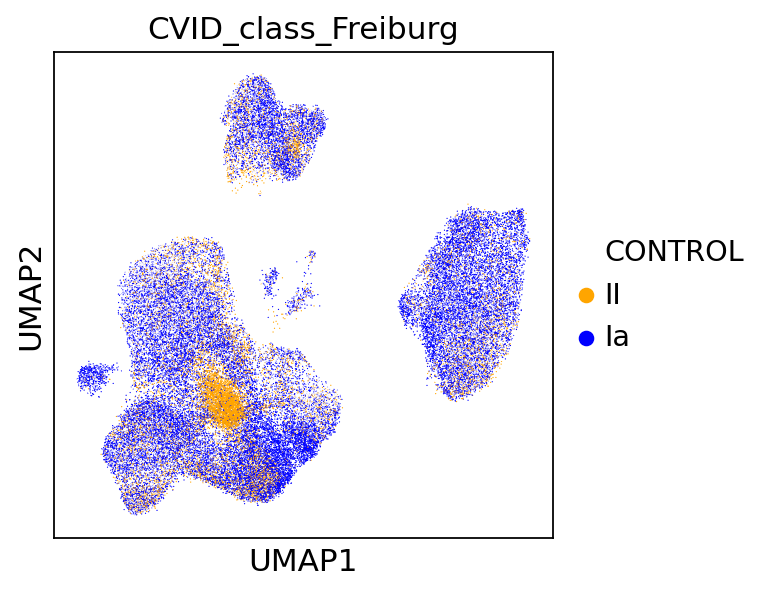

In [12]:
sc.pl.umap(adata_validation_cohort, color=['CVID_class_Freiburg'], palette=['white','orange','blue'])

In [13]:
adata_validation_cohort

AnnData object with n_obs × n_vars = 95064 × 2627
    obs: 'batch', 'bh_pval', 'cell_id', 'dataset', 'n_counts', 'n_genes', 'percent_mito', 'sample', 'scrublet_cluster_score', 'scrublet_score', 'stimulation', 'technique', 'is_doublet', 'donor', 'cell_type', 'prelim_annot', 'celltype_predictions', 'probabilities', 'S_score', 'G2M_score', 'phase', 'n_counts_protein', 'n_counts_protein_lognorm', 'louvain', 'barcode', 'Age', 'Sex', 'Age of disease onset', 'Autoimmunity', 'Gastrointestinal disease', 'Lung disease (bronchiectasis)', 'Lymphoadenopathy ', 'Splenomegaly', 'History of hypogammaglobulinemia, IgA deficiency or immunodeficiency in other family members', 'CVID_status', 'GC_celltype_predictions_all_genes', 'probabilities_GC_all_genes', 'CVID_class_Freiburg'
    var: 'gene_ids-0', 'feature_types-0', 'genome-0', 'n_cells-0', 'gene_ids-1', 'feature_types-1', 'genome-1', 'n_cells-1', 'gene_ids-2', 'feature_types-2', 'genome-2', 'n_cells-2', 'gene_ids-3', 'feature_types-3', 'genome-3', 'n

In [14]:
# subsetting to only Freiburg class Ia and CONTROL
adata_validation_cohort = adata_validation_cohort[adata_validation_cohort.obs['CVID_class_Freiburg'].isin(['CONTROL','Ia'])].copy()

In [15]:
adata_validation_cohort

AnnData object with n_obs × n_vars = 79758 × 2627
    obs: 'batch', 'bh_pval', 'cell_id', 'dataset', 'n_counts', 'n_genes', 'percent_mito', 'sample', 'scrublet_cluster_score', 'scrublet_score', 'stimulation', 'technique', 'is_doublet', 'donor', 'cell_type', 'prelim_annot', 'celltype_predictions', 'probabilities', 'S_score', 'G2M_score', 'phase', 'n_counts_protein', 'n_counts_protein_lognorm', 'louvain', 'barcode', 'Age', 'Sex', 'Age of disease onset', 'Autoimmunity', 'Gastrointestinal disease', 'Lung disease (bronchiectasis)', 'Lymphoadenopathy ', 'Splenomegaly', 'History of hypogammaglobulinemia, IgA deficiency or immunodeficiency in other family members', 'CVID_status', 'GC_celltype_predictions_all_genes', 'probabilities_GC_all_genes', 'CVID_class_Freiburg'
    var: 'gene_ids-0', 'feature_types-0', 'genome-0', 'n_cells-0', 'gene_ids-1', 'feature_types-1', 'genome-1', 'n_cells-1', 'gene_ids-2', 'feature_types-2', 'genome-2', 'n_cells-2', 'gene_ids-3', 'feature_types-3', 'genome-3', 'n

In [16]:
np.unique(adata_validation_cohort.obs['CVID_class_Freiburg'], return_counts=True)

(array(['CONTROL', 'Ia'], dtype=object), array([37972, 41786]))

## Somehow let's come to the subset of cell states shared between twins and validation cohort

In [17]:
celltypes_twins = list(np.unique(adata_twins.obs['cell_type']))
celltypes_validation_cohort = list(np.unique(adata_validation_cohort.obs['cell_type']))

In [18]:
len(celltypes_twins)

21

In [19]:
len(celltypes_validation_cohort)

29

In [20]:
# shared cell types
celltypes_shared = list(set(celltypes_twins) & set(celltypes_validation_cohort))
len(celltypes_shared)

15

In [21]:
celltypes_shared

['MAIT_cells',
 'T4_memory',
 'B_cells_memory_activated',
 'T4_naive',
 'NK_CD16_bright_activated',
 'T4_activated',
 'B_cells_naive_activated',
 'T_gd',
 'B_cells_naive',
 'NK_CD56_bright_activated',
 'T8_naive',
 'NK_CD56_bright',
 'T_regs',
 'NK_CD16_bright',
 'B_cells_memory']

In [22]:
celltypes_twins_not_validation_cohort = list(set(celltypes_twins) - set(celltypes_validation_cohort))
celltypes_validation_cohort_not_twins = list(set(celltypes_validation_cohort) - set(celltypes_twins))

In [23]:
celltypes_twins_not_validation_cohort

['T8_memory',
 'Myeloid_cells',
 'MAIT_cells_activated',
 'B_cells_oligoclonal',
 'T8_activated_1',
 'T8_activated_2']

In [24]:
celltypes_validation_cohort_not_twins

['pDC',
 'T8_activated',
 'TCM_CD8+',
 'Plasma_cells',
 'Monocytes_intermediate',
 'cDC1',
 'cDC2',
 'Monocytes_classical',
 'Macrophages',
 'Monocytes_non-classical',
 'iNKT_cells',
 'TEM_CD8+',
 'TMRA_CD8+',
 'Precursor_cells']

# Going to comapre only interactions between cell states in `celltypes_shared`

In [25]:
path_validation_cohort

'/lustre/scratch117/cellgen/team292/aa22/adata_objects/202009_CVID_revision/'

In [26]:
# reading in cellphone output tables for twins and validation cohort
cellphone = {}

cellphone['twins_upreg'] = pd.read_csv(path_twins + '20210218_cellphone_interactions_upreg_in_CVID_twin.csv', index_col=0)
cellphone['twins_downreg']  = pd.read_csv(path_twins + '20210218_cellphone_interactions_downreg_in_CVID_twin.csv', index_col=0)

cellphone['validation_cohort_upreg'] = pd.read_csv(path_validation_cohort + '20210222_cellphone_interactions_upreg_in_CVID_validation_cohort_subanalysis_Freiburg_Ia_and_healthy_donors.csv', index_col=0)
cellphone['validation_cohort_downreg'] = pd.read_csv(path_validation_cohort + '20210222_cellphone_interactions_downreg_in_CVID_validation_cohort_subanalysis_Freiburg_Ia_and_healthy_donors.csv', index_col=0)


In [27]:
# subset tables to cell type pairs of only cell types in celltypes_shared

for key in list(cellphone.keys()):
    print(key)
    print('shape of table before dropping some columns:', cellphone[key].shape)
    for col in cellphone[key].columns:
        ct_A = col.split('---')[0]
        ct_B = col.split('---')[1]
        #print(ct_A, ct_B)

        if not ((ct_A in celltypes_shared) & (ct_B in celltypes_shared)):
            cellphone[key] = cellphone[key].drop(col, axis=1)
            
    print('shape of table after dropping some columns:', cellphone[key].shape, '\n')



twins_upreg
shape of table before dropping some columns: (69, 385)
shape of table after dropping some columns: (69, 213) 

twins_downreg
shape of table before dropping some columns: (33, 220)
shape of table after dropping some columns: (33, 135) 

validation_cohort_upreg
shape of table before dropping some columns: (49, 659)
shape of table after dropping some columns: (49, 178) 

validation_cohort_downreg
shape of table before dropping some columns: (23, 346)
shape of table after dropping some columns: (23, 100) 



In [28]:
cellphone['twins_upreg']

,B_cells_memory---B_cells_memory_activated,B_cells_memory---B_cells_naive,B_cells_memory---B_cells_naive_activated,B_cells_memory---MAIT_cells,B_cells_memory---NK_CD16_bright,B_cells_memory---NK_CD16_bright_activated,B_cells_memory---NK_CD56_bright,B_cells_memory---NK_CD56_bright_activated,B_cells_memory---T4_activated,B_cells_memory---T4_memory,...,B_cells_naive_activated---B_cells_naive_activated,MAIT_cells---MAIT_cells,NK_CD16_bright---NK_CD16_bright,NK_CD16_bright_activated---NK_CD16_bright_activated,NK_CD56_bright---NK_CD56_bright,T4_activated---T4_activated,T4_memory---T4_memory,T8_naive---T8_naive,T_gd---T_gd,T_regs---T_regs
PVR_CD96,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
PVR_TIGIT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
NOTCH1_DLL3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
SIRPA_CD47,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
LGALS9_HAVCR2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CD52_SIGLEC10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
LTBR_LTB,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
CD47_SIRPG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
LAIR1_LILRB4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [29]:
np.unique(cellphone['twins_upreg'].sum(axis=1), return_counts=True)

(array([ 0., 15., 29., 30., 45., 57., 60., 69., 75., 82., 90.]),
 array([17, 23,  1,  8,  6,  3,  2,  1,  2,  2,  4]))

In [30]:
# creating a dictionary of inter2celltype_pair, where keys (interactions) are unique, but values (celltype pairs) may repeat
inter2celltype_pairs = {}

for group in list(cellphone.keys()):
    inter2celltype_pairs[group] = {}
    for interaction in list(cellphone[group].index):
        curr_table_subset = pd.DataFrame(cellphone[group].loc[interaction,:])
        curr_table_subset_nonzero = curr_table_subset[curr_table_subset[interaction] > 0]
        if len(curr_table_subset_nonzero) > 0:
            inter2celltype_pairs[group][interaction] = list(curr_table_subset_nonzero.index)

In [31]:
len(inter2celltype_pairs['twins_upreg'].keys())

52

In [33]:
list(inter2celltype_pairs['twins_upreg'].keys())[:10]

['PVR_CD96',
 'PVR_TIGIT',
 'NOTCH1_DLL3',
 'SIRPA_CD47',
 'LGALS9_HAVCR2',
 'COL19A1_integrin_a1b1_complex',
 'PLAUR_integrin_a4b1_complex',
 'CD40LG_integrin_a5b1_complex',
 'TGFB1_TGFBR3',
 'CXCR3_CXCL9']

In [34]:
# subsetting these dictionaries to shared interactions
shared_interactions_upreg = list(set(inter2celltype_pairs['twins_upreg'].keys()) & set(inter2celltype_pairs['validation_cohort_upreg'].keys()))
len(shared_interactions_upreg)

23

In [35]:
# subsetting these dictionaries to shared interactions
shared_interactions_downreg = list(set(inter2celltype_pairs['twins_downreg'].keys()) & set(inter2celltype_pairs['validation_cohort_downreg'].keys()))
len(shared_interactions_downreg)

11

In [36]:
# getting dictionaries of shared interaction to shared celltype_pairs
shared_cellphone_upreg = {}
shared_cellphone_downreg = {}

for interaction in shared_interactions_upreg:
    curr_list = list(set(inter2celltype_pairs['twins_upreg'][interaction]) & set(inter2celltype_pairs['validation_cohort_upreg'][interaction]))
    if len(curr_list) > 0:
        shared_cellphone_upreg[interaction] = curr_list
    
for interaction in shared_interactions_downreg:
    curr_list = list(set(inter2celltype_pairs['twins_downreg'][interaction]) & set(inter2celltype_pairs['validation_cohort_downreg'][interaction]))
    if len(curr_list) > 0:
        shared_cellphone_downreg[interaction] = curr_list

In [37]:
shared_cellphone_upreg_events = [item for sublist in list(shared_cellphone_upreg.values()) for item in sublist]
shared_cellphone_downreg_events = [item for sublist in list(shared_cellphone_downreg.values()) for item in sublist]

In [38]:
len(shared_cellphone_upreg_events)

341

In [39]:
len(shared_cellphone_downreg_events)

99

In [40]:
all_events_twins_upreg = [item for sublist in list(inter2celltype_pairs['twins_upreg'].values()) for item in sublist]
all_events_twins_downreg = [item for sublist in list(inter2celltype_pairs['twins_downreg'].values()) for item in sublist]

all_events_validation_cohort_upreg = [item for sublist in list(inter2celltype_pairs['validation_cohort_upreg'].values()) for item in sublist]
all_events_validation_cohort_downreg = [item for sublist in list(inter2celltype_pairs['validation_cohort_downreg'].values()) for item in sublist]

In [41]:
len(all_events_twins_upreg)

1918

In [42]:
len(all_events_twins_downreg)

854

In [43]:
len(all_events_validation_cohort_upreg)

924

In [44]:
len(all_events_validation_cohort_downreg)

292

In [47]:
curr_table_subset = pd.DataFrame(cellphone['twins_downreg'].loc['CD55_ADGRE5',:])
curr_table_subset#[curr_table_subset['CD55_ADGRE5'] > 0]

,CD55_ADGRE5
B_cells_memory---B_cells_memory_activated,0.0
B_cells_memory---NK_CD16_bright_activated,0.0
B_cells_memory---NK_CD56_bright,0.0
B_cells_memory---T_gd,0.0
B_cells_memory---T_regs,0.0
...,...
NK_CD16_bright_activated---NK_CD16_bright_activated,0.0
NK_CD56_bright---NK_CD56_bright,0.0
T4_memory---T4_memory,0.0
T_gd---T_gd,0.0
